In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
DF = pd.read_csv("WebScrapingMiniProject.csv")


In [4]:
for i in range(0,len(DF)):
    if len(DF['Total $'][i].split(',')) > 1:
        DF['Total $'][i] = DF['Total $'][i].split(',')[0]  +  DF['Total $'][i].split(',')[1]
    if len(DF['Avg $'][i].split(',')) > 1:
        DF['Avg $'][i] = DF['Avg $'][i].split(',')[0]  +  DF['Avg $'][i].split(',')[1]
    if len(DF['$ as Winner'][i].split(',')) > 1:
        DF['$ as Winner'][i] = DF['$ as Winner'][i].split(',')[0]  +  DF['$ as Winner'][i].split(',')[1]
    if len(DF["Strokes"][i].split(',')) > 1:
        DF['Strokes'][i] = DF['Strokes'][i].split(',')[0]  +  DF['Strokes'][i].split(',')[1]
    
     

/tmp/ipykernel_51/4158711035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Total $'][i] = DF['Total $'][i].split(',')[0]  +  DF['Total $'][i].split(',')[1]
/tmp/ipykernel_51/4158711035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Avg $'][i] = DF['Avg $'][i].split(',')[0]  +  DF['Avg $'][i].split(',')[1]
/tmp/ipykernel_51/4158711035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['$ as Winner'][i] = DF['$ as 

In [5]:
DF[['Total $', 'Avg $', "$ as Winner", "Strokes"]] = DF[['Total $', 'Avg $', "$ as Winner", "Strokes"]].astype(float)


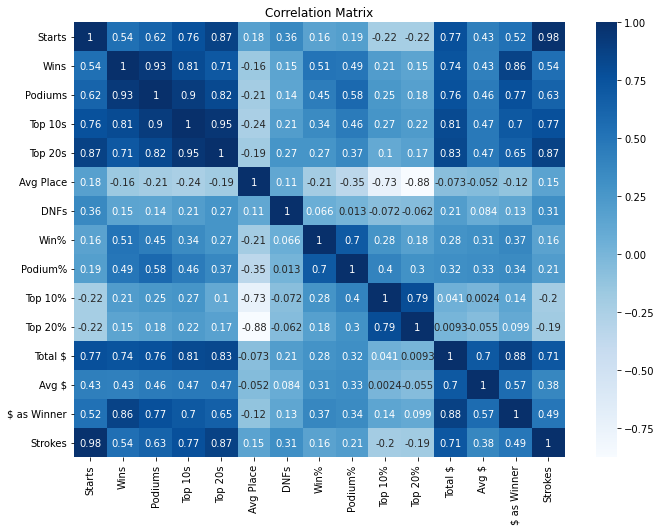

In [6]:
corr = DF.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.title('Correlation Matrix')
plt.savefig('BlogCorrMatrix.jpg', bbox_inches='tight')
plt.show()

In [7]:
Mpo = DF.iloc[0:218,]
Fpo = DF.iloc[218:428,]
Mpo['Class'] = "Mpo"
Fpo["Class"] = "Fpo"
DF = pd.concat([Mpo,Fpo])

/tmp/ipykernel_51/954832090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mpo['Class'] = "Mpo"
/tmp/ipykernel_51/954832090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fpo["Class"] = "Fpo"


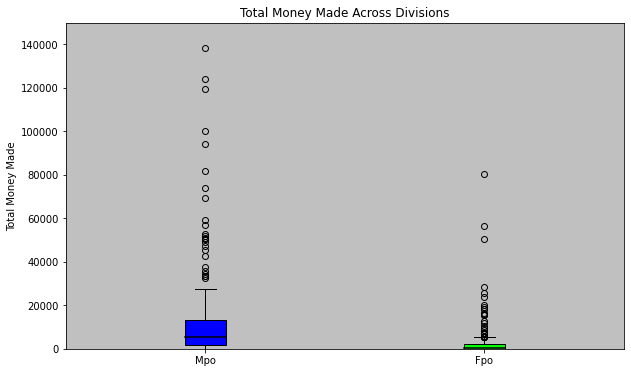

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

data = [Mpo["Total $"],Fpo["Total $"]]

box = ax.boxplot(data, patch_artist=True, medianprops=dict(color="black",linewidth=1.5))

colors = ['#0000FF', '#00FF00']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylim(0,150000)
    
ax.set_xticklabels(['Mpo','Fpo'])
ax.set_ylabel('Total Money Made')
ax.set_title('Total Money Made Across Divisions');
ax.patch.set_facecolor('silver')

plt.savefig('TotalMoneyBW.jpg',bbox_inches='tight')


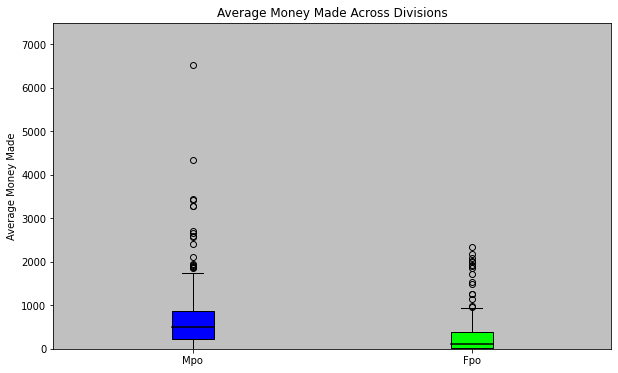

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

data = [Mpo["Avg $"],Fpo["Avg $"]]

box = ax.boxplot(data, patch_artist=True, medianprops=dict(color="black",linewidth=1.5))

colors = ['#0000FF', '#00FF00']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylim(0,7500)
    
ax.set_xticklabels(['Mpo','Fpo'])
ax.set_ylabel('Average Money Made')
ax.set_title('Average Money Made Across Divisions');

ax.patch.set_facecolor('silver')



plt.savefig('AvgMoneyBW.jpg',bbox_inches='tight')

/home/stats/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


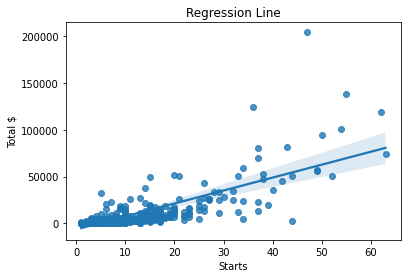

In [38]:
plt.title("Regression Line")
sns.regplot(DF.Starts, DF['Total $'])
plt.savefig('EDAreg1.jpg',bbox_inches='tight')

/home/stats/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


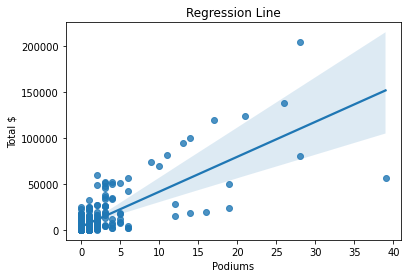

In [39]:
plt.title("Regression Line")
sns.regplot(DF.Podiums, DF['Total $'])
plt.savefig('EDAreg2.jpg',bbox_inches='tight')

In [21]:
DF.info()

DF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         428 non-null    object 
 1   Starts       428 non-null    int64  
 2   Wins         428 non-null    int64  
 3   Podiums      428 non-null    int64  
 4   Top 10s      428 non-null    int64  
 5   Top 20s      428 non-null    int64  
 6   Avg Place    428 non-null    float64
 7   DNFs         428 non-null    int64  
 8   Win%         428 non-null    float64
 9   Podium%      428 non-null    float64
 10  Top 10%      428 non-null    float64
 11  Top 20%      428 non-null    float64
 12  Total $      428 non-null    float64
 13  Avg $        428 non-null    float64
 14  $ as Winner  428 non-null    float64
 15  Strokes      428 non-null    float64
 16  Class        428 non-null    object 
dtypes: float64(9), int64(6), object(2)
memory usage: 57.0+ KB


,Starts,Wins,Podiums,Top 10s,Top 20s,Avg Place,DNFs,Win%,Podium%,Top 10%,Top 20%,Total $,Avg $,$ as Winner,Strokes
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,10.904206,0.436916,1.371495,4.390187,6.684579,21.751963,0.151869,2.451168,9.164626,47.831752,68.764953,8727.803738,513.429907,1871.649533,3377.154206
std,10.924166,1.890006,3.946342,6.657538,8.029865,16.681807,0.467011,10.104567,18.505506,31.772890,29.769844,19660.469341,690.847511,9350.729426,3243.005227
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.450000,9.090000,0.000000,0.000000,0.000000,242.000000
25%,3.000000,0.000000,0.000000,1.000000,2.000000,9.000000,0.000000,0.000000,0.000000,20.000000,44.330000,291.500000,85.250000,0.000000,1092.500000
50%,8.000000,0.000000,0.000000,2.000000,4.000000,16.120000,0.000000,0.000000,0.000000,40.000000,75.000000,1967.500000,296.000000,0.000000,2390.000000
75%,15.000000,0.000000,1.000000,5.000000,8.000000,31.312500,0.000000,0.000000,12.500000,72.880000,100.000000,8095.250000,649.750000,0.000000,4621.000000
max,63.000000,18.000000,39.000000,48.000000,51.000000,104.360000,3.000000,100.000000,100.000000,100.000000,100.000000,204258.000000,6515.000000,127895.000000,18193.000000
